# 1.编写程序
### 对定义在 [0,1] 上的连续函数 f(x) = sin(2πx), 近似的计算伯恩斯坦多项式Bn与 f(x) 的偏差 ϵn = ∥Bn(f, x) − f(x)∥∞, 并且绘出偏差 ϵn 随 n 变化的图形
### 代码：

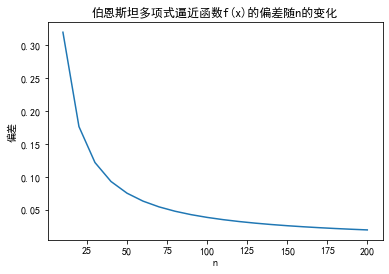

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
import math
from scipy.interpolate import BPoly
from sympy import *
from scipy import optimize

X=[0,1]
Y=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
i=0
for n in range(10,210,10):
    c=np.array([np.sin(2*math.pi*k/n) for k in range(n+1)]).reshape(-1,1)
    bp=BPoly(c,X) #求n阶伯恩斯坦多项式
    #定义偏差函数g(x)
    def g(x):
        return abs(bp(x)-np.sin(2*math.pi*x))
    m=optimize.fminbound(lambda x: -g(x), 0, 1)
    Y[i]=abs(bp(m)-np.sin(2*math.pi*m))
    i=i+1

plt.figure()
plt.plot(range(10,210,10),Y)
plt.xlabel('n')
plt.ylabel('偏差')
plt.title('伯恩斯坦多项式逼近函数f(x)的偏差随n的变化')
plt.show()

# 2.计算定义在区间 [0, 1] 的函数 $f(x)=\sqrt{1+x^2}$ 的最佳一致逼近多项式为 $p1(x)$; 求节点 x1, x2 ∈ (0, 1),使得以这两个节点作为插值节点所得到的的插值多项式是 $p1(x)$
### 解：
由于插值多项式的唯一性，若通过插值节点x1,x2作插值多项式使得其为p1(x),则两插值节点即为p1(x)与f(x)两交点，故通过解方程p1(x)-f(x)=0即得；而p1(x)可依照公式逐步解出。
### 代码：

In [4]:
import numpy as np
import math
from sympy import *

x=Symbol('x')
f=(1+x**2)**(1/2) #定义原函数表达式f
a1=f.subs(x,1)-f.subs(x,0) #计算p1(x)中系数a1
f_=diff(f,x)-a1
r=nsolve(f_,0.5) #求解区别于端点0，1的偏差点，记为r
a0=(f.subs(x,0)+f.subs(x,r))/2-r*a1/2 #计算p1(x)中系数a0
p1=a0+a1*x
[x1,x2]=solve((1+x**2)**(1/2)-a0-a1*x,x) #由于插值多项式的唯一性，插值节点x1,x2即为p1(x)与f(x)交点
print("最佳一致逼近多项式为p1(x)={}".format(p1))
print("两个插值节点分别为x1={},x2={}".format(x1,x2))

最佳一致逼近多项式为p1(x)=0.414213562373095*x + 0.955089860562227
两个插值节点分别为x1=0.128172448134641,x2=0.826917412427586
